<h1 style="color: #e3db24;">00 | Libraries and Settings</h1>

In [2]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #e3db24;">01 | Data Extraction and Exploration</h1>

In [5]:
df3 = pd.read_csv("df3_trees_cleaned.csv")
df3

,lat,long,genus,species,alley_tree,height,trunk_circumference,crown_diameter,sponsorship,variety
0,54.06,12.10,acer,acer platanoides,0,8.00,0.69,6.00,0,0
1,54.05,12.10,acer,acer platanoides,0,8.00,0.69,6.00,0,0
2,54.07,12.12,quercus,quercus robur,0,18.00,1.10,2.00,0,0
3,54.07,12.12,quercus,quercus rubra,1,9.00,1.00,2.00,0,0
4,54.16,12.08,tilia,tilia cordata,1,7.00,0.38,3.00,0,0
...,...,...,...,...,...,...,...,...,...,...
69348,54.19,12.15,quercus,quercus robur,0,25.00,2.40,2.00,0,0
69349,54.19,12.15,quercus,quercus robur,0,15.00,2.23,2.00,0,0
69350,54.08,12.19,prunus,prunus avium,0,13.00,1.52,1.00,0,0
69351,54.20,12.15,pinus,pinus sylvestris,0,19.00,1.58,7.00,0,0


<h2 style="color: #ec7511;">Making a Copy</h2>

In [7]:
df5 = df3.copy()

<h1 style="color: #e3db24;">02 | Inferential Statistics</h1>

<h2 style="color: #ec7511;">Sponsorship and Height</h2>

<h3 style="color: #ec300e;">Null and Alternative Hypothesis</h3>

In [11]:
null_hypothesis = "The mean height of trees with sponsorship is equal to the mean height of trees without sponsorship." # H₀
alt_hypothesis = "The mean height of trees with sponsorship is lower than the mean height of trees without sponsorship." # H₁

print(f"Null Hypothesis (H₀): {null_hypothesis}")
print(f"Alternate Hypothesis (H₁): {alt_hypothesis}")

Null Hypothesis (H₀): The mean height of trees with sponsorship is equal to the mean height of trees without sponsorship.
Alternate Hypothesis (H₁): The mean height of trees with sponsorship is lower than the mean height of trees without sponsorship.


<h3 style="color: #ec300e;">Level of Significance</h3>

In [13]:
alpha = 0.05  # 5% significance level
print(f"Level of Significance (α): {alpha}")

Level of Significance (α): 0.05


<h3 style="color: #ec300e;">Looking at Data before t-Test</h3>

In [15]:
# sample mean = mean height of trees with sponsorship
sample_mean = df5.loc[df5["sponsorship"] == 1, "height"].mean()

# pop_mean = mean height of all trees
pop_mean = df5.height.mean()

# std of the sample (trees with sponsorship)
sample_std = df5.loc[df5["sponsorship"] == 1, "height"].std()

# n = number of trees with sponsorship
n = df5["sponsorship"].sum()

print(f"The mean height of trees with a sponsorship is: {round(sample_mean, 2)} metres.")
print(f"The mean height of all trees: {round(pop_mean, 2)} metres.")
print(f"The standard deviation in height of trees with a sponsorship is: {round(sample_std, 2)} metres.")
print(f"The number of trees with a sponsorship is: {n}.")

The mean height of trees with a sponsorship is: 7.49 metres.
The mean height of all trees: 12.2 metres.
The standard deviation in height of trees with a sponsorship is: 4.21 metres.
The number of trees with a sponsorship is: 155.


<h3 style="color: #ec300e;">Calculate One-Tailed T-Test</h3>

In [17]:
sample = df5.loc[df5["sponsorship"] == 1, "height"]

# one-tailed (less for left-tailed: H1=the mean is lower)
t_stat, p_value = st.ttest_1samp(sample, pop_mean, alternative='less')
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.30f}")
print()

if p_value > alpha:
    print("We cannot reject H0: There is not enough evidence to say that the mean height for trees with sponsorship is lower.")
else:
    print("Reject the H0: There is evidence to say the mean height of trees with sponsorship is lower than for those without.")

Test Statistic (t): -13.92
P-Value: 0.000000000000000000000000000024

Reject the H0: There is evidence to say the mean height of trees with sponsorship is lower than for those without.


<h3 style="color: #ec300e;">Visualization of Left-Tailed T-Test</h3>

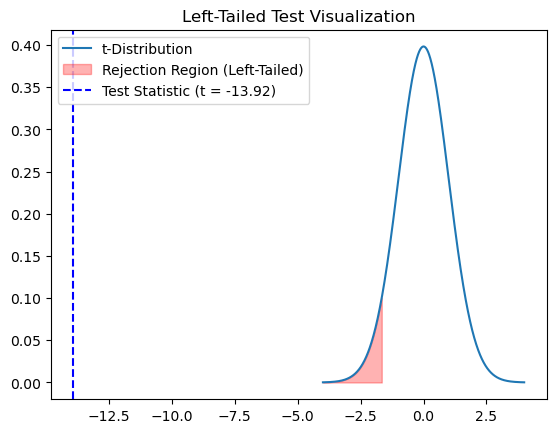

In [19]:
# values for t-distribution
x = np.linspace(-4, 4, 1000)
y = st.t.pdf(x, df=n-1)

plt.plot(x, y, label="t-Distribution")

# rejection range for left-tailed test
plt.fill_between(x, 0, y, where=(x < st.t.ppf(alpha, df=n-1)), color='red', alpha=0.3, label='Rejection Region (Left-Tailed)')

# t test
plt.axvline(t_stat, color='blue', linestyle='--', label=f'Test Statistic (t = {t_stat:.2f})')

plt.title("Left-Tailed Test Visualization")
plt.legend(loc="upper left")
plt.show()

<h3 style="color: #ec300e;">Interpretation of Left-Tailed T-Test</h3>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions:</strong>
<p>The results show that trees which have a sponsorship are significantly lower than trees without a sponsorship. Possible reasons for this are speculative but one could be that trees with a sponsorship might be younger. Unfortunately, there is no data regarding the ages of the trees. An obvious reason would be if there was a significant connection between tree genera and sponsorship: if specific lower tree genera were more likely to have a sponsorship. Yet, this was checked in the EDA and is not the case. So for now, there is no obvious reason why trees with a sponsorship should be lower.</p>
</div>


<h2 style="color: #ec7511;">Sponsorship and Trunk Circumference</h2>

<h3 style="color: #ec300e;">Null and Alternative Hypothesis</h3>

In [24]:
null_hypothesis = "The mean trunk circumference of trees with sponsorship is equal to the mean trunk circumference of trees without sponsorship." # H₀
alt_hypothesis = "The mean trunk circumference of trees with sponsorship is lower than the mean trunk circumference of trees without sponsorship." # H₁

print(f"Null Hypothesis (H₀): {null_hypothesis}")
print(f"Alternate Hypothesis (H₁): {alt_hypothesis}")

Null Hypothesis (H₀): The mean trunk circumference of trees with sponsorship is equal to the mean trunk circumference of trees without sponsorship.
Alternate Hypothesis (H₁): The mean trunk circumference of trees with sponsorship is lower than the mean trunk circumference of trees without sponsorship.


<h3 style="color: #ec300e;">Level of Significance</h3>

In [26]:
alpha = 0.05  # 5% significance level
print(f"Level of Significance (α): {alpha}")

Level of Significance (α): 0.05


In [27]:
# note: not all of these manual calculations are necessary for performing the t test, I am displaying the numbers out of interest

# sample mean = mean trunk circumference of trees with sponsorship
sample_mean = df5.loc[df5["sponsorship"] == 1, "trunk_circumference"].mean()

# pop_mean = mean trunk circumference of all trees
pop_mean = df5.trunk_circumference.mean()

# std of the sample (trees with sponsorship)
sample_std = df5.loc[df5["sponsorship"] == 1, "trunk_circumference"].std()

# n = number of trees with sponsorship
n = df5["sponsorship"].sum()

print(f"The mean trunk circumference of trees with a sponsorship is: {round(sample_mean, 2)} metres.")
print(f"The mean trunk circumference of all trees: {round(pop_mean, 2)} metres.")
print(f"The standard deviation in trunk circumference of trees with a sponsorship is: {round(sample_std, 2)} metres.")
print(f"The number of trees with a sponsorship is: {n}.")

The mean trunk circumference of trees with a sponsorship is: 0.72 metres.
The mean trunk circumference of all trees: 1.01 metres.
The standard deviation in trunk circumference of trees with a sponsorship is: 0.53 metres.
The number of trees with a sponsorship is: 155.


<h3 style="color: #ec300e;">Calculate One-Tailed T-Test</h3>

In [29]:
sample = df5.loc[df5["sponsorship"] == 1, "trunk_circumference"]

# one-tailed (less for left-tailed: H1=the mean is lower)
t_stat, p_value = st.ttest_1samp(sample, pop_mean, alternative='less')
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.11f}")
print()

if p_value > alpha:
    print("We cannot reject H0: There is not enough evidence to say that the mean trunk circumference for trees with sponsorship is lower.")
else:
    print("Reject the H0: There is evidence to say the mean trunk circumference of trees with sponsorship is lower than for those without.")

Test Statistic (t): -6.61
P-Value: 0.00000000029

Reject the H0: There is evidence to say the mean trunk circumference of trees with sponsorship is lower than for those without.


<h3 style="color: #ec300e;">Visualization of Left-Tailed T-Test</h3>

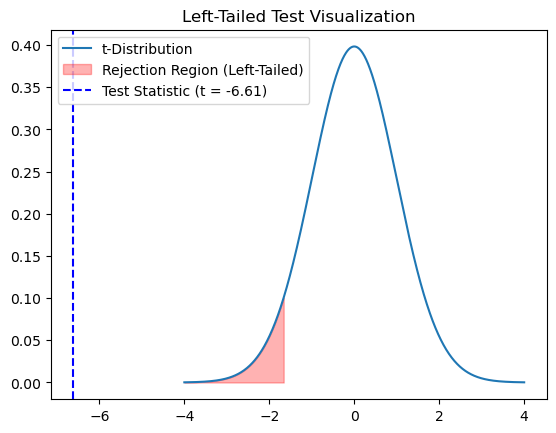

In [31]:
# values for t-distribution
x = np.linspace(-4, 4, 1000)
y = st.t.pdf(x, df=n-1)

plt.plot(x, y, label="t-Distribution")

# rejection range for left-tailed test
plt.fill_between(x, 0, y, where=(x < st.t.ppf(alpha, df=n-1)), color='red', alpha=0.3, label='Rejection Region (Left-Tailed)')

# t test
plt.axvline(t_stat, color='blue', linestyle='--', label=f'Test Statistic (t = {t_stat:.2f})')

plt.title("Left-Tailed Test Visualization")
plt.legend(loc="upper left")
plt.show()

<h3 style="color: #ec300e;">Interpretation of Left-Tailed T-Test</h3>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #b8daff;
    border-radius: 4px;
    background-color: #0eece8;
    color: #004085;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions:</strong>
<p>The results show that trees which have a sponsorship have a significantly smaller trunk circumference than trees without a sponsorship. The result is not as strong as for the influence of height but still very strong. As for possible reasons: This could strengthen the theory mentoned before that younger trees are more often being sponsored.</p>
</div>